In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data_Breach_Notifications_Affecting_Washington_Residents__Personal_Information_Breakdown_.csv")

In [3]:
df

,Id,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,InformationType,Year,WashingtoniansAffectedRange,BreachLifecycleRange,EntityState
0,9707,02/06/2017 12:00:00 AM,05/24/2017 12:00:00 AM,Cyberattack,2016-02-26T00:00:00,2016-12-05T00:00:00,"Incipio, LLC",Unclear/unknown,1650.0,Business,Accessories,Other,2017,"1,000-9,999",300-399,NaN
1,9708,05/26/2017 12:00:00 AM,05/26/2017 12:00:00 AM,Unauthorized Access,2013-10-23T00:00:00,2017-03-31T00:00:00,"Kennewick Public Hospital District, dba Trios ...",NaN,942.0,Health,NaN,Name,2017,500-999,500+,NaN
2,9708,05/26/2017 12:00:00 AM,05/26/2017 12:00:00 AM,Unauthorized Access,2013-10-23T00:00:00,2017-03-31T00:00:00,"Kennewick Public Hospital District, dba Trios ...",NaN,942.0,Health,NaN,Medical Information,2017,500-999,500+,NaN
3,9710,04/18/2017 12:00:00 AM,06/05/2017 12:00:00 AM,Unauthorized Access,2016-08-10T00:00:00,2017-02-09T00:00:00,"GameStop, Inc.",NaN,27956.0,Business,Retail,Name,2017,"10,000-49,999",200-299,NaN
4,9710,04/18/2017 12:00:00 AM,06/05/2017 12:00:00 AM,Unauthorized Access,2016-08-10T00:00:00,2017-02-09T00:00:00,"GameStop, Inc.",NaN,27956.0,Business,Retail,Financial & Banking Information,2017,"10,000-49,999",200-299,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,18672,08/16/2024 12:00:00 AM,03/19/2025 12:00:00 AM,Cyberattack,2024-08-12T00:00:00,2024-08-16T00:00:00,"OBI Seafoods, LLC",Ransomware,4689.0,Business,Other,Full Date of Birth,2025,"1,000-9,999",1-99,WA
5472,18672,08/16/2024 12:00:00 AM,03/19/2025 12:00:00 AM,Cyberattack,2024-08-12T00:00:00,2024-08-16T00:00:00,"OBI Seafoods, LLC",Ransomware,4689.0,Business,Other,Passport Number,2025,"1,000-9,999",1-99,WA
5473,18672,08/16/2024 12:00:00 AM,03/19/2025 12:00:00 AM,Cyberattack,2024-08-12T00:00:00,2024-08-16T00:00:00,"OBI Seafoods, LLC",Ransomware,4689.0,Business,Other,Health Insurance Policy or ID Number,2025,"1,000-9,999",1-99,WA
5474,18672,08/16/2024 12:00:00 AM,03/19/2025 12:00:00 AM,Cyberattack,2024-08-12T00:00:00,2024-08-16T00:00:00,"OBI Seafoods, LLC",Ransomware,4689.0,Business,Other,Medical Information,2025,"1,000-9,999",1-99,WA


In [4]:
# Verificar valores nulos
print(df.isnull().sum())

# Preencher valores nulos com a média (para colunas numéricas)
df.fillna(df.mean(numeric_only=True), inplace=True)

Id                                0
DateAware                        81
DateSubmitted                     0
DataBreachCause                   0
DateStart                       633
DateEnd                         937
Name                              0
CyberattackType                1437
WashingtoniansAffected           82
IndustryType                      0
BusinessType                   3126
InformationType                   0
Year                              0
WashingtoniansAffectedRange       0
BreachLifecycleRange              0
EntityState                    2394
dtype: int64


In [5]:
# Contar ocorrências dos tipos de informações comprometidas
print(df['DataBreachCause'].value_counts())

DataBreachCause
Cyberattack            3994
Unauthorized Access    1191
Theft or Mistake        291
Name: count, dtype: int64


In [6]:
print(df.columns)

Index(['Id', 'DateAware', 'DateSubmitted', 'DataBreachCause', 'DateStart',
       'DateEnd', 'Name', 'CyberattackType', 'WashingtoniansAffected',
       'IndustryType', 'BusinessType', 'InformationType', 'Year',
       'WashingtoniansAffectedRange', 'BreachLifecycleRange', 'EntityState'],
      dtype='object')


In [7]:
# Converter 'DateSubmitted' para datetime
df['DateSubmitted'] = pd.to_datetime(df['DateSubmitted'], errors='coerce')

# Extrair ano e mês
df['Ano'] = df['DateSubmitted'].dt.year
df['Mes'] = df['DateSubmitted'].dt.month

# Número de notificações por ano
print(df['Ano'].value_counts().sort_index())

C:\Users\Jamielly\AppData\Local\Temp\ipykernel_13236\357667237.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateSubmitted'] = pd.to_datetime(df['DateSubmitted'], errors='coerce')


Ano
2015      46
2016     160
2017     252
2018     220
2019     218
2020     770
2021     860
2022     766
2023    1120
2024     984
2025      80
Name: count, dtype: int64


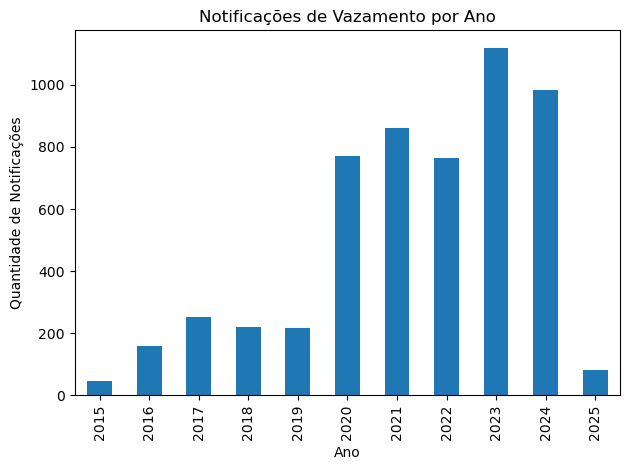

In [8]:
df['Ano'].value_counts().sort_index().plot(kind='bar')
plt.title('Notificações de Vazamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notificações')
plt.tight_layout()
plt.show()

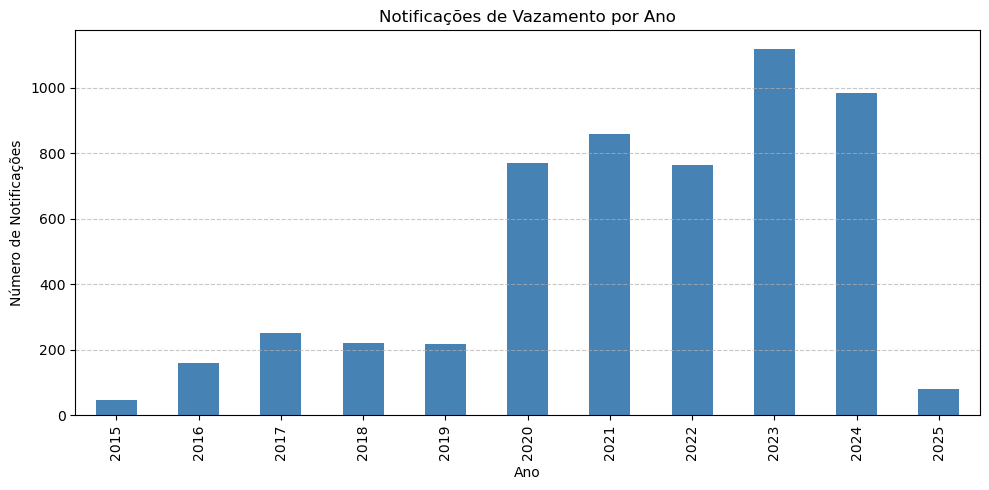

In [9]:
# Gráfico de barras por ano
plt.figure(figsize=(10, 5))
df['Ano'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Notificações de Vazamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()